In [42]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [73]:
import sys
sys.path.append('..')
from src.transform import RegusTransform


data = pd.read_json('../src/scrape/regus/scraped_data_usa1.json')
data = RegusTransform(data).structured
data.head()

,url,title,location,google_maps,features,price_office_space,price_coworking,price_virtual_offices,price_meeting_rooms,image_1,...,desc_h,desc_p,cnt_private_offices,cnt_coworking_desks,cnt_meeting_rooms,latitude,longitude,country,state,city
0,https://www.regus.com/en-us/united-states/cali...,303 Twin Dolphin Drive.,"303 Twin Dolphin Drive, Redwood City, CA 94065",https://www.google.com/maps/dir//37.5235361034...,City/Town Centre Accessible Major transport co...,385,369.0,95,45,https://assets.iwgplc.com/image/upload/CentreI...,...,A prestigious waterside setting,With its favorable climate and great community...,78,18,4,37.523537,-122.258568,united-states,california,redwood-city
1,https://www.regus.com/en-us/united-states/geor...,The Pinnacle Building.,"The Pinnacle Building, Atlanta, GA 30326",https://www.google.com/maps/dir//33.8504455417...,Major transport connections Meeting Rooms On-s...,265,255.0,49,29,https://assets.iwgplc.com/image/upload/CentreI...,...,Impressive office in renowned business district,Atlanta Pinnacle boasts a prime downtown posit...,86,24,4,33.850445,-84.360390,united-states,georgia,atlanta
2,https://www.regus.com/en-us/united-states/nort...,2530 Meridian Parkway.,"NC, Durham - RTP Meridian 2530 Meridian Parkwa...",https://www.google.com/maps/dir//35.9112578969...,City/Town Centre Accessible Major transport co...,189,179.0,75,19,https://assets.iwgplc.com/image/upload/CentreI...,...,Modern design in a leading community,Take advantage of our prime location just two ...,121,13,6,35.911259,-78.899963,united-states,north-carolina,durham
3,https://www.regus.com/en-us/united-states/flor...,5201 Blue Lagoon Drive.,"Waterford Business Park, Miami, FL 33126",https://www.google.com/maps/dir//25.7834703719...,City/Town Centre Major transport connections M...,299,285.0,95,29,https://assets.iwgplc.com/image/upload/CentreI...,...,Prime airport location,Waste no time with an efficient work environme...,178,26,5,25.783470,-80.291626,united-states,florida,miami
4,https://www.regus.com/en-us/united-states/cali...,400 Continental Boulevard.,"400 Continental Blvd, El Segundo, CA 90245",https://www.google.com/maps/dir//33.9209373731...,City/Town Centre Accessible Gym and Fitness Ro...,359,339.0,109,29,https://assets.iwgplc.com/image/upload/CentreI...,...,"Impressive architecture, close to household names",Prepare to feel inspired at LAX Continental Gr...,147,16,3,33.920937,-118.390106,united-states,california,el-segundo


### Features   -   Format
**url** - 'https://www.regus.com/en-us/[country]/[city]/[workspace]'
<br>
**title** - string con el nomber del lugar o edificio
<br>
**location** - '[street], [city], [postal code]' 
<br>
**google_maps** - 'https://www.google.com/maps/dir//[latitude]/[longitude]' 
<br>
**features** - caracteristicas del lugar separadas por saltos de linea ('n')
<br>
**price_office_space** - numero entero que indica el precio por persona por mes ([price]/person/month)
<br>
**price_coworking** - numero entero que indica el precio por persona por mes ([price]/person/month)
<br>
**price_virtual_offices** - numero entero que indica el precio por mes ([price]/month)
<br>
**price_meeting_rooms** - numero entero que indica el precio por hora ([price]/hour)
<br>
**image_1, image_2, image_3** - 'https://assets.iwgplc.com/image/upload/CentreImagery/[endpoint]' 
<br>
**desc_h** - string con el encabezado de la descripcion
<br>
**desc_p** - string con el contenido de la descripcion
<br>
**cnt_private_offices** - entero que indica la cantidad de oficinas privadas en el lugar
<br>
**cnt_coworking_desks** - entero que indica la cantidad de escritorios en el lugar
<br>
**cnt_meeting_rooms** - entero que indica la cantidad de habitaciones para reuniones en el lugar
<br>
**latitude** - latitud en google maps
<br>
**longitud** - longitud en google maps
<br>
**country** - pais
<br>
**state** - estado/provincia
<br>
**city** - ciudad
<br>

In [44]:
data.dtypes

url                       string
title                     string
location                  string
google_maps               string
features                  string
price_office_space         int32
price_coworking          float64
price_virtual_offices      int32
price_meeting_rooms        int32
image_1                   string
image_2                   string
image_3                   string
desc_h                    string
desc_p                    string
cnt_private_offices        int32
cnt_coworking_desks        int32
cnt_meeting_rooms          int32
latitude                 float32
longitude                float32
country                   string
state                     string
city                      string
dtype: object

### Datos faltantes

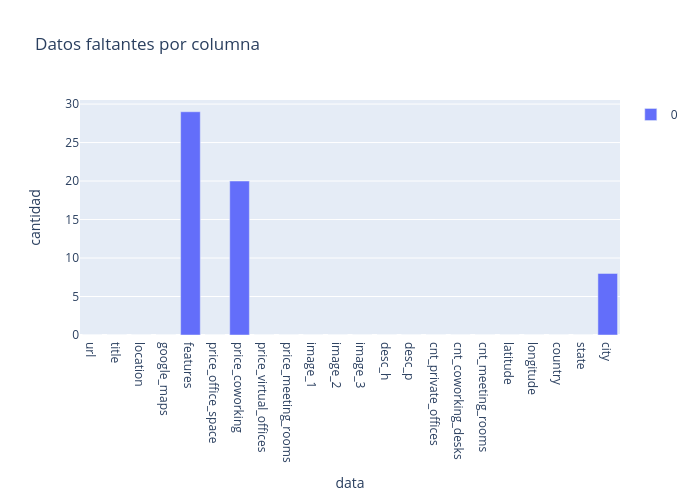


Proporcion de datos faltantes:

features: 3.02%
price_coworking: 2.08%
city: 0.83%


In [61]:
null = data.isna().sum()
null_pct = null / data.shape[0] * 100

fig = px.bar(
    null,
    title = "Datos faltantes por columna",
    labels={"value": "cantidad", "index": "data", "variable": ""}
)
fig.show()
fig.write_image('plots/missing_data.png')
table = null_pct[[True if i > 0 else False for i in null_pct]]
print("\nProporcion de datos faltantes:\n")
for row in table.items(): print(f'{row[0]}: {row[1]:.2f}%')

### Mapa de espacios

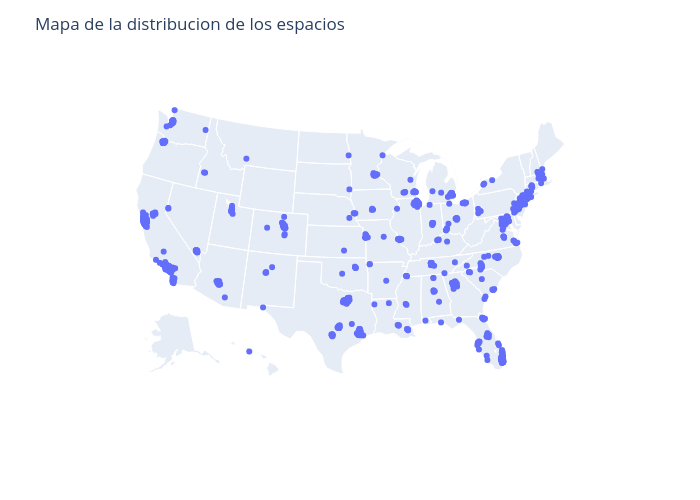

In [64]:
import plotly.express as px

fig = px.scatter_geo(
    data, 
    lat="latitude",
    lon="longitude",
)
fig.update_layout(
        title = 'Mapa de la distribucion de los espacios',
        geo_scope='usa',
)

fig.show()
fig.write_image('plots/map_dist_workspaces.png')

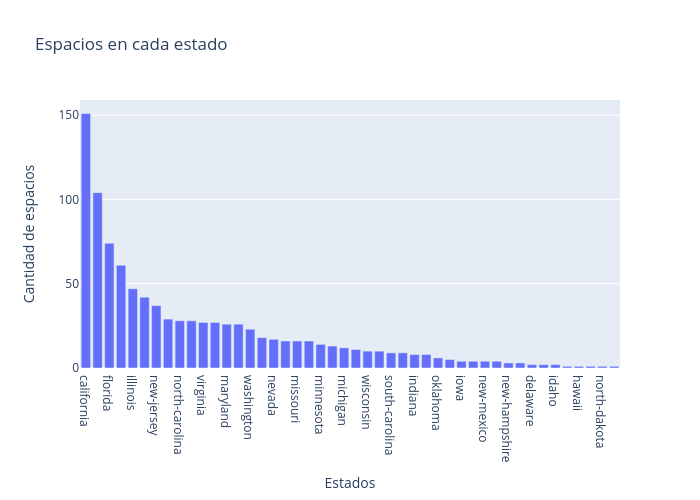

In [69]:
state_counts = data.state.value_counts()
fig = px.bar(
    y=state_counts, 
    x=state_counts.index,
    title='Espacios en cada estado',
    labels={"y": "Cantidad de espacios", "x": "Estados"}
)
fig.show()
fig.write_image('plots/states_counts.png')

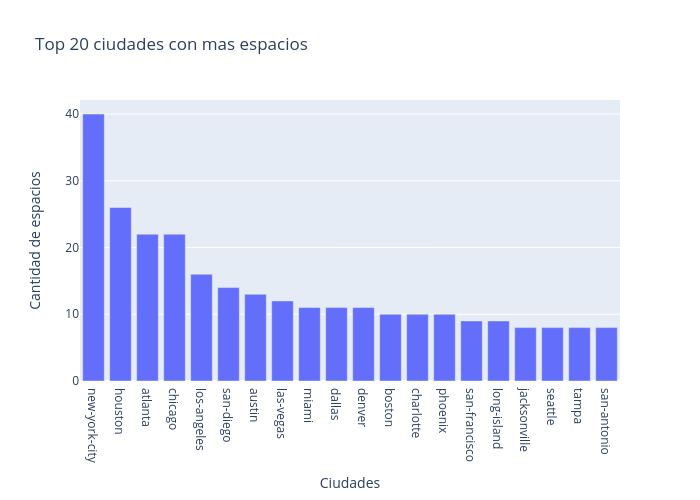

In [66]:
city_counts = data.city.value_counts()[:20]
fig = px.bar(
    y=city_counts, 
    x=city_counts.index,
    title='Top 20 ciudades con mas espacios',
    labels={"y": "Cantidad de espacios", "x": "Ciudades"}
)
fig.show()
fig.write_image('plots/top_cities.png')

### Demostracion rapida de texto a html

In [76]:
from IPython.display import display, HTML
data_html = lambda x: (
    "<br>"
    + "<div style='width: 700px'>"
    + f"<div style='font-size: 20px'>{x+1})</div>"
    
    # Images 
    + "<div class='images-container'>"
    + "<img class='image' src=" + data.image_1 + ">"
    + "<img class='image' src=" + data.image_2 + ">"
    + "<img class='image' src=" + data.image_3 + ">"
    + "</div>"
    
    # description
    + "<h2 class='subheader'>" + data.desc_h + "</h2>\n"
    + "<p class='p'>" + data.desc_p + "</p>"
    
    # location link
    + "<a href=" + data.google_maps + ">view on map</a>"
    
    + "</div>"
)

style = """<style>
div.images-container {
    display: flex;
    width: 200px;
    align-items: center;
    margin: 10px;
}

img.image {
    width: auto;
    heigh: auto;
    margin: 0;
    padding: 0;
}

h2.subheader {
    color: #333;
    font-size: 20px;
    align-text: center;
}

p.p {
    color: #333;
    font-size: 15px;
}

</style>"""


for i in range(3):
    display(HTML(style + data_html(i)[i]))